In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [2]:
data = pd.read_csv('term-deposit-marketing-2020.csv')
#data.count()
data.head()

#print(data["age"].max())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [3]:
#preprocess data
#one hot encoding & label enconding for the categorical variables


# X: features, y:target variable

data['housing'].replace(to_replace=['no','yes'], value=[0,1],inplace=True)
data['loan'].replace(to_replace=['no','yes'], value=[0,1],inplace=True)
data['default'].replace(to_replace=['no','yes'], value=[0,1],inplace=True)



X = data[['age', 'default', 'balance', 'housing', 'loan', 'day',  'duration', 'campaign']]

X = pd.concat([X, pd.get_dummies(data['month'])], axis=1)

X = pd.concat([X, pd.get_dummies(data['job'])], axis=1)

X = pd.concat([X, pd.get_dummies(data['marital'])], axis=1)

X = pd.concat([X, pd.get_dummies(data['education'])], axis=1)


X = pd.concat([X, pd.get_dummies(data['contact'])], axis=1)


y = data['y']   


In [4]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics



#cross validation with kf=5 

kf = KFold(n_splits=5,  random_state=50, shuffle=True)
acc_scores_f1 = []
acc_scores_jaccard =  []
for train_index, test_index in kf.split(X, y): 
    
    print("Training data index: ", train_index) 
    print("Test data index: ", test_index) 
 
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index ], y.iloc[train_index], y.iloc[test_index]

    #print(X_test.isnull().values.any())
    model = DecisionTreeClassifier(criterion="entropy", max_depth = 8).fit(X_train, y_train) 
  

    preds = model.predict(X_test)
    acc_scores_f1.append(metrics.f1_score(y_test,preds, average = None))
    acc_scores_jaccard.append(metrics.accuracy_score(y_test,preds))
    
print("f1_score mean accuracy of the k-fold validation model:" , np.mean(acc_scores_f1))
print("Jaccard mean accuracy of the k-fold validation model:" , np.mean(acc_scores_jaccard))


Training data index:  [    0     1     3 ... 39997 39998 39999]
Test data index:  [    2    11    12 ... 39982 39983 39990]
Training data index:  [    0     1     2 ... 39995 39997 39999]
Test data index:  [    6    18    20 ... 39994 39996 39998]
Training data index:  [    0     2     4 ... 39996 39997 39998]
Test data index:  [    1     3     5 ... 39987 39995 39999]
Training data index:  [    1     2     3 ... 39996 39998 39999]
Test data index:  [    0     4     7 ... 39988 39993 39997]
Training data index:  [    0     1     2 ... 39997 39998 39999]
Test data index:  [    9    14    16 ... 39951 39957 39976]
f1_score mean accuracy of the k-fold validation model: 0.717434154108551
Jaccard mean accuracy of the k-fold validation model: 0.93485


prediction counts


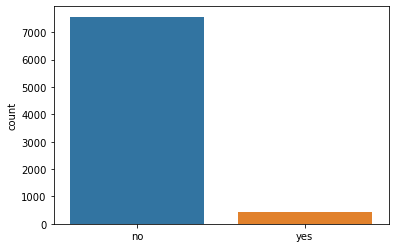

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.countplot(preds)
print("prediction counts")